# SDA: Assignment 1

**Name**: Mees Kerssens

**Student ID**: 13465953

# Introduction
Cross-sectional data consists of repeated measurements of the ‘same’ system. There is no sense of time dependence in this type of data. Think for instance about the list of heights of all students in the class room. This is the same measurement (sample) on a student population repeated many times. The order in which the heights are measured is irrelevant and it makes little sense to try and predict the next height to be measured based on the previous height observation. We will get back to this later when we study time-series data.

It does make sense to study the distributions in the data and to compare subsets of the data to each other. For instance, one could ask whether the male students tend to be taller than the female students, based on the data gathered. Another question could be: what is the average height of the entire student population (planet) based on only observing a small random subset of heights? How many data points do we need in order to be confident about our estimate? These are the types of questions that you will study in the course. In this assignment you will:
1. Generate random numbers;
2. Create a data model and generate data samples;
3. Fit a normal distribution to real data;
4. Find the most likely fit and its confidence interval;
5. Test simple hypotheses using confidence intervals.

## Coding and References
You should use the Python programming language for all programming tasks. You should use native Python code for all tasks unless otherwise instructed. Whenever you have already implemented a particular function before by yourself, from that point onward you are allowed to use the more efficient implementation from a package. So for instance, if you have already implemented yourself the `mean()` function and have used it at least once in an answer then you are allowed to use the `np.mean()` function from numpy.

The exceptions are:
1. the logarithm function, which you may find in the packages `math` or `numpy`.
2. the square root function √x, which can be computed using `x**0.5`.
Further Exception (only week 4): the use of vectors and matrices (`numpy.array`) is additionally allowed in week 4's assignment. (Essentially I assume that you know how to implement multidimensional arrays by nesting lists, so no need to show that explicitly.) Still, before you use the `np.dot` function from numpy, for instance, implement it yourself first to show that you know what it does exactly. Also for clustering, such as k-means clustering: implement it yourself first and use it at least once to show that it works. If needed for performance reasons you can subsequently use the implementation from the `sklearn` package, for example.  

For some questions you may have to look up certain facts, formulas, equations, or freshen up your knowledge. The problems in the assignments do not always refer to pertinent sources; you are expected to research into missing knowledge yourself. 
For refreshers of the very basics of probability theory, or additional resources behind statistical concepts introduced here, please look on Canvas for the resources provided.

Please do not ever copy (parts of) your answer or code from any other source, be it online or from fellow students. You can help each other understand the problem and to compare outcomes, but not copy answers.

## Submission
Please upload your answers to all questions in Jupyter Notebook format (.ipynb extension) through the appropriate Canvas page no later than Sunday, November 7, 2021 at 23:59. Your answers and derivations should be included inline in your Jupyter Notebook file (do not remove any output before saving the file). Be sure to make every step explicit and clearly identifiable (computational performance or code brevity are not graded). Submissions by e-mail or past this deadline will not be considered.
Deadline extension requests will not be considered unless they are mediated through a study advisor.

## Grading
You can earn a maximum of 100 points. In case you do not submit both your answers and code by the deadline then you receive an “NA”. If you submit your answers and code but score 0 points then your grade will be a 1 (Dutch grading system). Scoring all 94 points means your grade becomes a 10. An amount of bonus points can be earned which is added to your score (up to the maximum just mentioned). That is, each week you can earn a maximum grade of 10 and it is not possible to transfer (bonus) points from one assignment to another.

Each of the weekly assignments will have a relative weight proportional to the maximum number of points. In total they make up 50% of your final grade.

**Note for Problem 1**: Problem 1 in this assignment will not be considered for grading. You are advised to make it but it is not compulsory. We have provided a notebook with the correct answers which is also meant to give examples of how questions should be answered. You can find it in the Canvas page under assignment 1. During the second lecture session in the first week of the course, this assignment will be used to illustrate what kind of answers we are looking for.


In [2]:
import matplotlib.pyplot as plt

## Problem 1 (warm up)

Before we can generate 'random' datasets we need to have a *random number generator* (RNG). This is a very crucial piece of underlying technology that you will rely on very often, both for data analysis as well as for modeling and simulation. It is important to have a basic understanding of how a computer generates random numbers. It can never generate perfectly random numbers; all hardware inside a computer or laptop is completely deterministic. However there are algorithms to get as close as possible. To help you get a feel for what a computer does 'under the hood' you will now program your own random number generator and test that it works as expected.

Computers generate the next 'random' integer number $X_{n+1}$ based on a calculation on the previously generated integer number $X_n$. This 'calculation' is also referred to as 'generator'. Simply put, computers should do this as 'chaotically' as possible, i.e., a small change of the previous number should make a potentially big difference in the next number being generated. Also, the entire range of numbers should be eventually covered with equal frequency.



### 1.1
Make a function `randint(a, c, m)` which returns a new random integer in the range $0,...,2^{32}-1$ every time you call it. Make use of one global variable `seed` and make sure that your function can change its value. The easiest technique is the [Linear Congruential generator](https://www.wikiwand.com/en/Linear_congruential_generator) but you may also try a different technique (in which case the arguments to the function may be different). Find suitable parameter values for $a, c, m$ online. If they fail your validation test (below) then choose different values.


[0 points]


In [3]:
seed = 3049563458304

def randint(a = 0xFD43FD, c = 0xC39EC3, m = 2**32):
    global seed
    seed=(a*seed+c)%m
    return(seed)


### 1.2
Make a function `rand()` which returns a new random real number (float) in the range $[0,1)$ every time you call it.

[0 points]




In [4]:
def rand():
    return randint()/2**32


### 1.3
Test whether your RNG works properly. Make a histogram<sup>2</sup> of $n=10^7$ random real numbers and using $k=50$ bins. Label your axes and give the figure a brief but explanatory caption. Show the histogram and make sure that the deviations of bin heights are visible.

<span style="font-family:Arial; font-size: 0.8em;">Note 2: Import the matplotlib.pyplot package by executing import matplotlib.pyplot as plt and then use its plt.hist(data, numbins) function.</span>

[0 points]




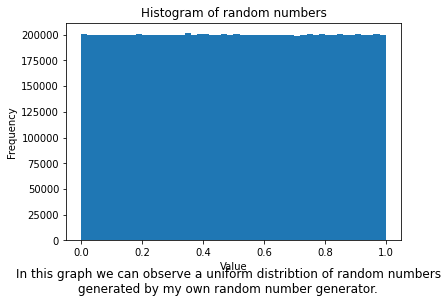

In [5]:
ns = [rand() for _ in range(10**7)]
k = 50

bins = plt.hist(ns, bins=k)

# label the axes
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of random numbers')

text = "In this graph we can observe a uniform distribtion of random numbers generated by my own random number generator."
plt.figtext(0.5, -0.05, text, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

### 1.4
Are the deviations of the bin heights in the histogram as expected? Let us see. 



#### 1.4.1
For any given $n$ and $k$ we expect that the bin height of each individual bin follows one and the same particular type of distribution, assuming that your RNG is indeed truly uniformly distributed. Please provide the name this probability distribution for an individual bin height and specify its parameters in terms of $n$ and $k$.

**Hint:** the uniform distribution of the RNG does not imply a uniform distribution of a bin's height.


[0 points]



We expect a uniform distribution. With 50 bins we expect every bin to have the same amount of values. The total amount of values is 10\**7. Each bin thus should contain 10\**7/50 values. The bin heights itself are binomial distributed B(n, p) with n = 10\**7 and p = 1/k = 1/50. 

#### 1.4.2

What is the expected mean and the standard deviation for each bin's height that corresponds with this theoretical distribution? Specify the two analytical expressions.

[0 points]



The mean is np = 10\**7/50 and std = sqrt(np(1-p)) = sqrt((10\**7)(1-1/50))

#### 1.4.3
Use the return values from the histogram function you used to obtain the list of bin heights in the figure. Are these (experimentally obtained) mean and standard deviation indeed 'close' (let's say it deviates no more than $20\%$) to our theoretical prediction<sup>3</sup>.

<span style="font-family:Arial; font-size: 0.8em;">Note 3: Don't confuse this with a statistical notion of closeness to the parameter, or with a confidence level. These notions will be introduced later. Instead, in this question you should determine whether or not the estimates are more than $20\%$ larger than or smaller than the theoretical values.}?</span>

[0 points]



In [6]:
def my_mean(ns):
    return sum(ns)/len(ns)

def my_std(ns):
    mean = my_mean(ns)
    return (sum((x - mean)**2 for x in ns)/len(ns))**.5

n = 10**7
p = 1/50
real_mean = n*p
real_std = (n*p*(1-p))**.5

values = bins[0]
mean = my_mean(values)
std = my_std(values)

print(f"Real mean: {mean} is percentage of theoretical mean: {mean/real_mean*100}%")
print(f"Real std: {std} is percentage of theoretical std: {std/real_std*100}%")
print("Mean is always 100% of theoretical mean. Std is still between 20% close")

Real mean: 200000.0 is percentage of theoretical mean: 100.0%
Real std: 484.21309358587155 is percentage of theoretical std: 109.37258918625874%
Mean is always 100% of theoretical mean. Std is still between 20% close


#### 1.4.4

For relatively large $n$ and large $k$ the above-mentioned distribution becomes closely approximated by another type of distribution. What is the name of this distribution and what are the expressions for its mean and standard deviation? Does your RNG also pass the same test using this distribution as benchmark instead?

[0 points]



In [7]:
# Normal distribution is the same as binomial with large n and k.
mean = n*p
std = (n*p*(1-p))**.5

# which is the same as the previous question.



#### 1.4.5 (bonus)

Perform another test of (uniform) randomness of your own choosing, show and explain its result with either in one figure or a very small table (and caption), and conclude whether your RNG passes the test or not. You may either think of your own or look up one of the common tests. Common tests are integer generator tests, including the birthday test, periodicity least significant bit, spectral test, and many others. The test must be your own implementation, not 'off-the-shelf'.

[0 points]



In [8]:
# YOUR CODE HERE

## Problem 2

Now we have a uniformly distributed RNG (*), but we need more. All kinds of theoretical distributions are found in real data, including Normal, Log-normal, Pareto, Beta, etc. We need a way to generate random samples from any given distribution. In this assignment you will make an RNG for a Normal distribution.

\* = as a failsafe, you can use `numpy.random.uniform` if you did not manage to implement your own generator above.

In [9]:
from scipy.special import erf, erfinv
import numpy as np

### 1.

A normally distributed random variable $X$ is denoted $X \sim \mathcal{N}(\mu, \sigma^2)$. Please specify the formula for probability density function (PDF) $f(x)dx = \Pr(x < X < x+dx)$ in terms of $\mu$ and $\sigma$. Also please specify its cumulative density function (CDF) $\Pr(X \leq x)$.

[3 points]

pdf normal distribution: f(x) = 1/(sqrt(2pi) * sigma) * exp(-1/2 * ((x-mu)/sigma)\**2)


cdf normal distribution: F(x) = 1/2 * (1 + erf((x-mu)/(sigma*sqrt(2))))

### 2.
Plot the CDF<sup>4</sup> on the range of $\mu-2\sigma,\mu+2\sigma$ for an arbitrary choice of values for $\mu$ and $\sigma$. (Always label your axes and provide a concise but explanatory caption.) Use specifically this figure to indicate and explain:
1. which numbers should have the highest probability
2. which numbers should have lower probability of being sampled by a corresponding normally distributed RNG.

<span style="font-family:Arial; font-size: 0.8em;">Note 4: The special error function `erf(z)` and its inverse `erfinv(y)` are available in the `scipy.special` package.</span>

[4 points]

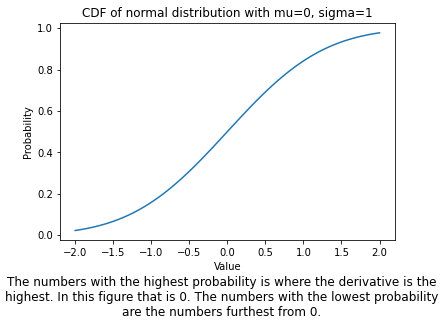

In [10]:
def normal_cdf(mu, sigma, x):
    return (1 + erf((x - mu) / (sigma * 2**.5))) / 2

mu = 0
sigma = 1
xs = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)
ys = [normal_cdf(mu, sigma, x) for x in xs]

plt.plot(xs, ys)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title(f"CDF of normal distribution with {mu=}, {sigma=}")

text = f"The numbers with the highest probability is where the derivative is \
the highest. In this figure that is {mu}. The numbers with the lowest \
probability are the numbers furthest from {mu}."

plt.figtext(0.5, -0.13, text, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

### 3.

For an RNG to be normally distributed we need the probability density of generating a value x for X to follow the density curve of the normal distribution.
How can the probability density $p(X=x)$ be derived/computed from the CDF<sup>5</sup>? You may also add drawings of the CDF figure to help you explain.
Use your uniform RNG in the range $[0,1)$ and this insight to describe how one could construct a normally distributed RNG.

<span style="font-family:Arial; font-size: 0.8em;">Note 5: **Hint:** As you know it is not correct to speak of the probability of X being equal to x for a continuous variable. You can however think of the probability of X falling within a small interval $(x, x+dx)$. For such a small interval you can locally approximate the pdf as a straight line. </span>

[5 points]

To derive on the PDF we can take the derivative of the CDF. To construct a normally distributed RNG we can use the inverse of the CDF. We can then sample from a uniform distribution and use the inverse of the CDF to get a normally distributed value.

### 4a.

In general, function $G(y)$ is an inverse of function $F(x)$ if $G(F(x)) = x$. Find the specific inverse formula that you are going to need (as determined under the previous question) and program it into a function, with arguments $\mu$ and $\sigma$ and of course a number $y$ For which the inverse value is to be computed. 

[4 points]

In [11]:
def inverse_normal_CDF(mu, sigma, y):
    return mu + sigma * 2**.5 * erfinv(2*y - 1)

### 4b.

Use this inverse function to program a Python function `randnorm(mu, sigma)` to generate normally distributed random values.

[2 points]

In [12]:
def randnorm(mu, sigma):
    return inverse_normal_CDF(mu, sigma, rand())

### 5.

Verify that it works properly. First show a histogram plot for any choice for $\mu$ and $\sigma$ for at least $10^5$ samples. Then do a similar test as in the previous problem: generate a large number of samples and compare the average and the standard deviation to the theoretical prediction. (No need for binning this time.) Let's use again a maximum relative error of $20\%$ to decide whether it works or not. If your relative error is higher, try a larger number of samples. Briefly explain what you did, show your results, and conclude.

[3 points]

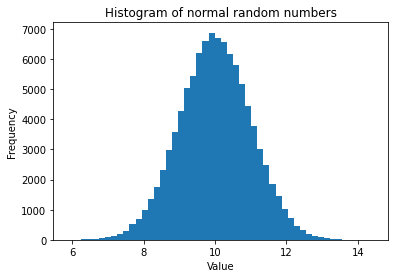

mu=10, sigma=1, calc_mu=10.001902587178117, calc_sigma=1.000030304135161
Percentage of mu: 100.01902587178118%, percentage of sigma: 100.0030304135161%
I calculated the mean and the standard deviation of the sampled values.
These values should be very close to the chosen mu and sigma respectively. 
When comparing these values they get very close and under 20% difference.


In [13]:
N = 10**5
mu = 10
sigma = 1

ns = [randnorm(mu, sigma) for _ in range(N)]

plt.hist(ns, bins=50)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of normal random numbers')
plt.show()

calc_mu = my_mean(ns)
calc_sigma = my_std(ns)

print(f"{mu=}, {sigma=}, {calc_mu=}, {calc_sigma=}")
print(f"Percentage of mu: {calc_mu/mu*100}%, percentage of sigma: {calc_sigma/sigma*100}%")
print("I calculated the mean and the standard deviation of the sampled values.\n\
These values should be very close to the chosen mu and sigma respectively. \n\
When comparing these values they get very close and under 20% difference.")

### 6. (bonus)

Perform an additional test to see if your new RNG really follows a normal distribution. One option is to look again at the bin heights as for the uniform RNG -- only this time the bin heights are not identically distributed -- and see if their deviations from their theoretical predictions are 'as expected', for some reasonable notion of 'as expected'. Also any more advanced so-called [normality test](https://en.wikipedia.org/wiki/Normality_test) or a test based on the Kolmogorov-Smirnov test is permitted as long as it is implemented by yourself. Present and explain the results concisely and make your conclusion.

[6 bonus points]

In [14]:
# YOUR CODE HERE

## Problem 3

A *dataset* and a *model* are two very different things. Briefly, a dataset is a sequence of measurements (numbers or vectors). A model is a mathematical description of a process that might have generated this dataset. In the following assignments you will create your own mathematical models and discover how tricky it is to make well-founded conclusions especially from sparse datasets.

In parts of this assignment you will analyze a real dataset of the nutrient intake values for 737 women (calcium, iron, protein, vitamin A, vitamin C). It is available on Canvas as [nutrient.csv](http://sites.stat.psu.edu/~ajw13/stat505/fa06/09_Hotel/05_Hotel_example.html). It is in comma-separated values (CSV) format which is quite a common format for small and simple datasets. You can read it into your program by the following code snippet.

<span style="font-family:Arial; font-size: 0.8em;">Note 8: **Hint**: If you want to handle datasets in a more advanced way, try the powerful Pandas package (but there is a bit of a learning curve).</span>

The recommended USDA daily intakes are listed in the table below.

| Nutrient  | Recommended | Sample mean  |
|-----------|-------------|--------------|
| Calcium   | 1000 mg     | 624.0 mg     |
| Iron      | 15mg        | 11.1 mg      |
| Protein   | 60g         | 65.8 g       |
| Vitamin A | 800 $\mu$g  | 839.6 $\mu$g |
| Vitamin C | 75 mg       | 78.9 mg      |


In [15]:
import pandas as pd
import csv

fin = open('nutrient.csv', 'r')
csvr = csv.reader(fin)
samples = [row for row in csvr]  # list of strings
samples = [list(map(float, s)) for s in samples]  # list of floats
fin.close()

### 1.

Let us focus on the intake of vitamin C of the sample of women (last column). Our research question is whether *the entire female population* (in this case of the USA) could be following (on average) the recommended intake in the table above. At first glance it may look 'close', but still it is not the same. We only have a sample of a mere 737 individuals whereas the entire female population of the USA is roughly $1.5 \cdot 10^8$, so about 5 orders of magnitude larger. Since there is an overwhelming number of women whom we did not measure their nutrient intake for, the question is: what can we really infer from the data?

As a first step to get a feel for the data, plot a histogram of the vitamin C intake values using a suitable number of bins. In this plot, indicate the recommended value, the sample mean, and the sample standard deviation by plotting lines over the histogram<sup>9</sup>. 

A first thing to notice is that the data does not seem to follow a normal distribution perfectly. This is a fact of life. But we will continue nevertheless, pretending that it is.

From just glancing at this plot, do you expect that the data could have been sampled from a population which has exactly the recommended intake as its population mean? Briefly mention what you base your answer on, or alternatively, why you think this plot cannot yet be used to make such a guess.

<span style="font-family:Arial; font-size: 0.8em;">Note 9: The easiest way to do this is to execute additional `plot` calls after the `hist` call but before the `show` call.</span>

[3 points]

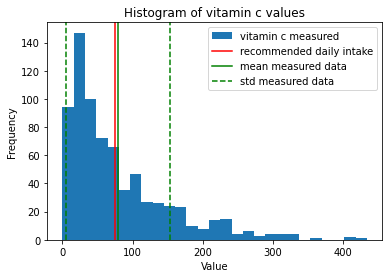

I think that this data could not be sampled from a population with the 
recommended daily intake as its mean. This is because maybe the mean and 
recommended are very close, this is only becaue there are a few people that 
have a very high intake thus skewing the mean closer to the recommended.


In [16]:
df = pd.read_csv('nutrient.csv',
                 sep=',',
                 header=None, names=["id", "calcium", "iron", "protein", "vitamin_a", "vitamin_c"],
                 converters={"id": lambda x: int(float(x)), "calcium": float, "iron": float, "protein": float, "vitamin_a": float, "vitamin_c": float})

n_bins = int(np.sqrt(len(df)))
plt.hist(df["vitamin_c"], bins=n_bins, label="vitamin c measured")
plt.axvline(x=75, color='r', label="recommended daily intake")
plt.axvline(x=df["vitamin_c"].mean(), color='g', label="mean measured data")
plt.axvline(x=df["vitamin_c"].mean() + df["vitamin_c"].std(), color='g', linestyle='--', label="std measured data")
plt.axvline(x=df["vitamin_c"].mean() - df["vitamin_c"].std(), color='g', linestyle='--')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of vitamin c values')
plt.legend()
plt.show()

print("I think that this data could not be sampled from a population with the \n\
recommended daily intake as its mean. This is because maybe the mean and \n\
recommended are very close, this is only becaue there are a few people that \n\
have a very high intake thus skewing the mean closer to the recommended.")


### 2.

Let us assume that the vitamin C intake values of US women is generated by a statistical model. For simplicity, let us assume the normal distribution $\mathcal{N}(\mu, \sigma^2)$ as this model. Here, $\mu$ and $\sigma$ are the `true` parameter values. $\mu$ would correspond to the mean intake of a population of infinite size, and $\sigma^2$ would correspond to the intake variance of this infinite population. The whole point is that for any finite sample size (like 737) the sample mean $\hat{\mu}$ and sample standard deviation $\hat{\sigma}$ will never be exactly equal to those of the infinite population (or generating model). Since we cannot observe a population of infinite size nor can read out nature's generating model, the question we must ask is: which values for $\mu$ and $\sigma$ are probable and which are not?

So let's look at the conditional probability density function $\Pr(\mu', \sigma' \mid \vec{x})$ that a model $\mathcal{N}(\mu', \sigma')$ would actually be the generating model of the given list of observed values $\vec{x} = x_1, x_2, \ldots, x_n$. Insiders may recognize this as a statement that 'Bayesianists' make, as opposed to frequentists, but let us ignore this debate for now.

Basic probability theory tells us that $\Pr(A,B) = \Pr(B \mid A) \cdot \Pr(A) = \Pr(A \mid B) \cdot \Pr(B)$. Use this fact to derive an expression for $\Pr(\mu', \sigma' \mid \vec{x})$ in terms of the following probabilities:


- $\Pr(\vec{x} \mid \mu', \sigma')$;
- $\Pr(\mu', \sigma')$;
- $\Pr(\vec{x})$.


Also explain briefly the meaning of each of these three terms in your own words.

[3 points]

- $\Pr(\vec{x} \mid \mu', \sigma')$; the probability of observing the data given the model parameters
- $\Pr(\mu', \sigma')$; The propability that we have the correct model parameters
- $\Pr(\vec{x})$. the probability of observing the data



$\Pr(\mu', \sigma' \mid \vec{x}) = \frac{\Pr(\vec{x} \mid \mu', \sigma')\Pr(\mu', \sigma')}{\Pr(\vec{x})}$

### 3.

Two common assumptions are that both $\Pr(\vec{x})$ and $\Pr(\mu', \sigma')$ are uniformly distributed<sup>10</sup>. Use this to derive the fact that:

$$ \Pr(\mu', \sigma' \mid \vec{x}) = \Pr(\vec{x} \mid \mu', \sigma') \cdot C. $$

Here, $C$ is an unknown constant. As an aside, an equivalent and perhaps more common way of writing this is:

$$ \Pr(\mu', \sigma' \mid \vec{x}) \propto \Pr(\vec{x} \mid \mu', \sigma'). $$

<span style="font-family:Arial; font-size: 0.8em;">Note 10: For definiteness, assume that both probability distributions are defined over a finite yet sufficiently large domain.</span>

[2 points]

By the formula of the last exercise:

$\Pr(\mu', \sigma' \mid \vec{x}) = \frac{\Pr(\vec{x} \mid \mu', \sigma')\Pr(\mu', \sigma')}{\Pr(\vec{x})}$

We can rewrite this as:


$\Pr(\mu', \sigma' \mid \vec{x}) = \Pr(\vec{x} \mid \mu', \sigma')\frac{\Pr(\mu', \sigma')}{\Pr(\vec{x})}$

Because $\frac{\Pr(\mu', \sigma')}{\Pr(\vec{x})}$ are uniformly distributed we can treat this as a constant C.


### 4.

Briefly explain the meaning of each of the two (mathematical) assumptions in your own words. 

[2 points]

The change that we choose the right parameters is the same for all parameters. Thus this is a uniform distribution. The same goes for the data. The probability of observing the data is the same for all data.

### 5.

This implies of course the converse: $\Pr(\vec{x} \mid \mu', \sigma') \propto \Pr(\mu', \sigma' \mid \vec{x})$. A function that equals a probability function but up to an unknown constant is called a **likelihood function**. In this case the important observation is that $\Pr(\vec{x} \mid \mu', \sigma')$ is a likelihood function for $\Pr(\mu', \sigma' \mid \vec{x})$. Let us write $\Pr(\vec{x} \mid \mu', \sigma') \equiv L(\mu', \sigma' \mid \vec{x})$. This terminology serves just to remind ourselves that we do not know the normalization constant and therefore should not use the likelihood function $L(\mu', \sigma' \mid \vec{x})$ directly as the probability function $\Pr(\mu', \sigma' \mid \vec{x})$. However we can still do very useful things with it.

Suppose that we will find for example that $L(78, 3 \mid \vec{x}) = 0.3$ and $L(80, 4 \mid \vec{x}) = 0.1$. Name a fact (about the probabilities) that we can infer from this and name also a fact (about the probabilities) that we cannot infer from this.

[2 points]

We can infer with the likelihood function that the with 78 and 3 the probability of the data is higher then with 80 and 4. We cannot infer the actual probability of the data.

### 6.

So to compute $L(\mu', \sigma' \mid \vec{x})$ we must compute $\Pr(\vec{x} \mid \mu', \sigma')$. There is still an issue because a normal distribution $\mathcal{N}(\mu', \sigma')$ provides the probability of a single observation $x_i$, i.e., $\Pr(x_i \mid \mu', \sigma')$, not of a list of observations $\vec{x}$. Therefore we cannot yet calculate it from the data.

A common assumption to address this is that each observation $x_i$ is drawn from nature's generating model $\mathcal{N}(\mu', \sigma')$ independently of all other observations. In other words, conditioned on a given model, we will assume that the probability of each $x_i$ is independent of all other observations. Use this assumption and standard probability theory to rewrite $\Pr(\vec{x} \mid \mu', \sigma')$ into an equivalent form which **can** be calculated directly from the data.

[3 points]

With conditional probability we can rewrite 

$\Pr(\vec{x} \mid \mu', \sigma')=\frac{\Pr(\vec{x} \cap \mu', \sigma')}{\Pr(\mu', \sigma')}$

And because $\vec(x)$ and $(\mu', \sigma')$ are independent we can rewrite this to:


$\Pr(\vec{x} \mid \mu', \sigma')=\frac{\Pr(\vec{x}) \Pr(\mu', \sigma')}{\Pr(\mu', \sigma')}$



### 7.

Program now the function `likelihood(mu, sigma, samples)`. What value do you get for the likelihood for $\mathcal{N}(78, 3^2)$ (i.e., $\sigma=3$)? And what about $\mathcal{N}(80, 4^2)$?

[4 points]

In [17]:
def normal_pdf(mu, sigma, x):
    return 1/(sigma * (2*np.pi)**.5) * np.exp(-1/2 * ((x - mu) / sigma)**2)

def likelihood(mu, sigma, samples):
    return np.prod([normal_pdf(mu, sigma, x) for x in samples])

print(likelihood(78, 3, df["vitamin_c"]))

0.0


### 8.

Clearly something is going wrong here. It is a technical issue: a computer cannot store very very small numbers. The smallest floating-point (real) number that Python can store is roughly $10^{-308}$ on most computers. Take a look at the individual probability densities for the model $\mathcal{N}(78, 3^2)$ of individual vitamin C intake values. Use them to make a very rough, 'back-of-the-envelope' estimate of what the order of magnitude<sup>11</sup> of $L(78, 3, \mid \vec{x})$ could actually be.

<span style="font-family:Arial; font-size: 0.8em;">Note 11: Let us define the 'order of magnitude' of number $a \cdot 10^b$ as $b$.</span>

[3 points]

values = 54.141, 24.839, 155.455, 224.688, 80.961

probability densities of those values is:



In [18]:
values = [54.141, 24.839, 155.455, 224.688, 80.961]
for v in values:
    print(normal_pdf(78, 3, v))

2.4500809701170606e-15
8.65640029198784e-70
2.379058210991509e-146
0.0
0.08170538872109087


### 9.

One way around this is to have a smaller dataset, e.g., throw away all but the first 100 datapoints. However this is not something we want to do because data is valuable and precious. Instead, what is typically done is to switch to the *log-likehood*, i.e., $\log{(L(\mu', \sigma' \mid \vec{x}))}$. 

For the purpose of (for instance) finding the *maximum likelihood estimate* (MLE) $\mathcal{N}(\hat{\mu}, \hat{\sigma}^2)$ for the model this operation does not create any problem. Explain briefly (or derive mathematically) why and how we can still find the model with maximum likelihood after this operation.

[3 points]

It does not pose a problem because the maximum of the log likelihood is the same as the maximum of the likelihood. This is because the relative relation between the values still stand. Higher values in the max likelihood are still bigger then smaller values even in the log likelihood. Thus maxemazing both these function give the same value.

### 10.
Use basic algebra rules of the logarithm to implement a function `log_likelihood(mu, sigma, samples)` which does return correct values<sup>12</sup>. Verify that the likelihood value of $\mathcal{N}(78, 3)$ is roughly $10^{-97487}$ or $e^{-224474}$ (which can be a lot smaller than your back-of-the-envelope estimate, depending on your approach, but that is ok).

<span style="font-family:Arial; font-size: 0.8em;">Note 12: **Hint**: if you find that the likelihood of an individual sample may be calculated to be exactly 0 then you noticed this is a problem because $\log{0}$ is undefined. The best way to solve this is to use directly the density function for the normal distribution, and simplifying the logarithm expression to get rid of the exponentiation using the rule $log_b{b^x} = x$. You can also solve this by performing 128-bit operations, for instance by using `np.float128(mu)` instead of `mu`. If you do not have `float128` on your computer, try `float64`.</span>

[4 points]

In [19]:
def log_likelihood(mu, sigma, samples):
    mu = np.float128(mu)
    sigma = np.float128(sigma)
    samples = np.array(samples, dtype=np.float128)

    log_pdf_values = -np.log(sigma * np.sqrt(2 * np.pi)) - ((samples - mu) ** 2) / (2 * sigma ** 2)
    return np.sum(log_pdf_values)

print(log_likelihood(78,3, df["vitamin_c"]))


-222987.24967255357411


### 11.

Show two plots: of $\log{(L(\mu', \sigma'=3 \mid \vec{x}))}$ and $\log{(L(\mu'=78, \sigma' \mid \vec{x}))}$, so with $\mu$ and $\sigma$ on the x-axis, respectively. From glancing at these plots, what do you estimate are the MLE values $\hat{\mu}$ and $\hat{\sigma}$? (For the latter you may have to play with the plotting range in order to see it.)

[3 points]

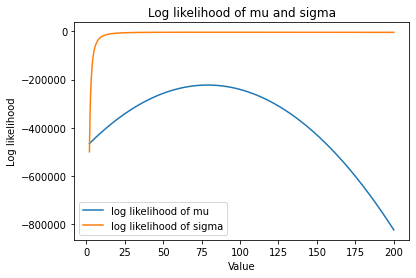

With a rough estimation the maximum likelihood of mu is around 30 and sigma around


In [41]:

xs = np.linspace(2, 200, 1000)
llh_mus = [log_likelihood(x, 3, df["vitamin_c"]) for x in xs]
llh_sigmas = [log_likelihood(78, x, df["vitamin_c"]) for x in xs]

plt.plot(xs, llh_mus, label="log likelihood of mu")
plt.plot(xs, llh_sigmas, label="log likelihood of sigma")
plt.xlabel('Value')
plt.ylabel('Log likelihood')
plt.title('Log likelihood of mu and sigma')

# plt.ylim(-20000,0) # uncomment for better visibility of sigma
plt.legend()
plt.show()

print("With a rough estimation the maximum likelihood of mu is around 30 and sigma around 85.")

### 12.

Does the MLE value $\hat{\mu}$ appear to be sensitive to changing your initial value for $\sigma'$? (Test this by repeating the first plot under the previous question where you set the initial guess to different values, such as multiplied by $2$.) What about the sensitivity of the MLE value for $\hat{\sigma}$ to changing your initial value for $\mu'$? So in which order do you expect that we should estimate the MLEs for the two parameters?

[3 points]

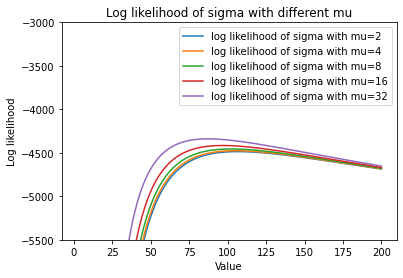

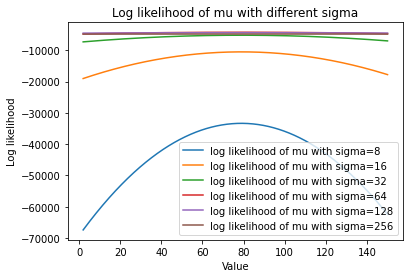

In [63]:
mus = [2**i for i in range(1, 6)]
xs = np.linspace(2, 200, 1000)

for mu in mus:
    llh_sigmas = [log_likelihood(mu, x, df["vitamin_c"]) for x in xs]
    plt.plot(xs, llh_sigmas, label=f"log likelihood of sigma with mu={mu}")

plt.xlabel('Value')
plt.ylabel('Log likelihood')
plt.title('Log likelihood of sigma with different mu')
plt.ylim(-5500,-3000)

plt.legend()
plt.show()

sigmas = [2**i for i in range(3, 9)]
xs = np.linspace(2, 150, 1000)

for sigma in sigmas:
    llh_mus = [log_likelihood(x, sigma, df["vitamin_c"]) for x in xs]
    plt.plot(xs, llh_mus, label=f"log likelihood of mu with sigma={sigma}")

plt.xlabel('Value')
plt.ylabel('Log likelihood')
plt.title('Log likelihood of mu with different sigma')
plt.legend()
plt.show()


In [64]:
print(my_mean(df["vitamin_c"]))
print(my_std(df["vitamin_c"]))

78.92844640434195
73.54532622031317


### 13.

Perhaps you have noticed that the two MLE values are suspiciously close to the sample mean and sample standard deviation<sup>13</sup> of the vitamin C intake data. (Verify this for yourself.) This is a special property of the normal distribution. You will now derive this yourself analytically.

Use the rewritten formula for $\log{(L(\mu', \sigma' \mid \vec{x}))}$ which you found under question 6 as starting point. You are looking for values for $\mu'$ and $\sigma'$ which maximize the log-likelihood, i.e., 

$$ \textrm{arg max}_{\mu', \sigma'} \log{(L(\mu', \sigma' \mid \vec{x}))}.$$

How to find the $\hat{\mu}$ and $\hat{\sigma}$ which indicate the location of this maximum? Recall from high school that for minima and maxima it is true that all (partial) first derivatives are zero. Let us assume that there is only one maximum (the global maximum), which seems reasonable given the log-likelihood plots you made earlier, and that there are no inflection points. In our case we have two partial derivatives which you should set to zero<sup>14</sup>.

Do this first for $\mu'$ and then for $\sigma'$ using basic algebra, showing mathematically that indeed:

$$ \hat{\mu} = \frac{1}{N} \sum_i x_i, $$
$$ \hat{\sigma} = \sqrt{\frac{1}{N} \sum_i (x_i - \hat{\mu})^2}. $$

<span style="font-family:Arial; font-size: 0.8em;">Note 13: For this particular dataset the MLE for standard deviation is actually a bit off. This is because the assumption of normality actually does not hold for this dataset, as you have seen in your histogram. But let us continue nonetheless.</span>

<span style="font-family:Arial; font-size: 0.8em;">Note 14: Tip: for finding $\hat{\sigma}$ it might be easier to study the partial derivative $\frac{\partial \log{L}}{\partial \sigma^2}$ instead of $\frac{\partial \log{L}}{\partial \sigma}$.</span>

[8 points]

YOUR ANSWER HERE

### 14.

Another general and very common method for finding a best-fitting model is called **least squared error** or least-squares estimate (LSE) method. For the particular case of the normal distribution it happens to be the case that the MLE method actually reduces to the LSE, resulting in the exact same model. In fact you just proved that. Indicate the step in each of your two derivations where it becomes clear that actually an LSE is performed.


[3 points]

YOUR ANSWER HERE

### 15.

Now that we have found the most likely (or least squared error) model for our dataset one could think we are finished wondering whether the US female vitamin C intake values are on average the recommended value. $\mathcal{N}(\hat{\mu}, \hat{\sigma}^2)$ is, after all, the best estimate we can make for the generating model and hence for the ('almost infinite') population of all US women. We could compare this so-called 'point estimate' model with the recommended intake value, see that $\hat{\mu}$ is not equal to the latter, and conclude that US women therefore do not follow the recommendation on average.

However it is not so simple. Recall from the log-likelihood plots that there is some uncertainty about the parameter values: the likelihood plots were not very sharply peaked around the real value. Informally speaking, the most likely estimate $\hat{\mu}$ is exactly that: most likely. That does not mean that this likelihood is very high.

What we need is a **confidence interval** (CI). A CI consists of a lower bound and an upper bound within which the real $\mu$ lies with a certain high probability. Typically the probability of 95% is chosen. There are two ways: based on the sample and based on the **null-hypothesis** that the population follows the recommended value. We will now focus on the sample-based method.

To start, calculate or estimate the confidence interval $[ -\beta, \beta ]$ of a single sample $z$ of the standard normal distribution $Z \sim \mathcal{N}(0,1)$. That is, find an approximate value for $\beta$ such that $\Pr(-\beta \leq z \leq \beta) \approx 0.95$<sup>15</sup>. You may either go by trial-and-error or you may use a well-known rule of thumb sometimes referred to as the 68--95--99.7 rule.

<span style="font-family:Arial; font-size: 0.8em;">Note 15: **Hint:** use a CDF.</span>

[2 points]

### 16.

In general, for a random variable $X \sim \mathcal{N}(a, s^2)$ which has standard deviation $s$, derive first that its mean becomes $c \cdot a$ in case the variable is multiplied by a constant $c \cdot X$ (so multiplying each sample value $x_i$ with constant $c$). Then derive the fact that the standard deviation for $c\cdot X$ will have standard deviation $c \cdot s$. 

[4 points]

YOUR ANSWER HERE

### 17.
If $X \sim \mathcal{N}(a, s^2)$ then what is the distribution of $X + d$?

[2 points]

YOUR ANSWER HERE

### 18.

If two independent samples $X_1$ and $X_2$ are drawn from $\mathcal{N}(a_1, s_1^2)$ and $\mathcal{N}(a_2, s_2^2)$, respectively, then their sum $X_1 + X_2$ is distributed as $\mathcal{N}(a_1+a_2, s_1+s_2)$. (Note that this is different from the case where $X_1=X_2$, which is of course not independent.)

Derive now step by step that the mean of $N$ independent samples of $\mathcal{N}(a, s^2)$ still has mean $a$ but has standard deviation $\frac{1}{\sqrt{N}} s$. This latter quantity is called the **standard error of the mean** (SEM).

[4 points]

YOUR ANSWER HERE

### 19.

Now we are ready to define a confidence interval for any normal distribution -- in particular the distribution of sample means of $N$ samples from the 'real' distribution $\mathcal{N}(\mu, \sigma)$. Specify symbolically (so in terms of $N$, $\mu$, and $\sigma$ in your expression) the confidence interval for the 95% confidence level for the vitamin C intake (you may use the 68--95--99.7 rule of thumb).

[1 point]

YOUR ANSWER HERE

### 20.

Of course we still do not know the actual values for $\mu$ and $\sigma$, all we have so far is two MLE point estimates $\hat{\mu}$ and $\hat{\sigma}$ (which may still be very unlikely) and a symbolic CI expression around the real distribution (which we cannot compute because we do not know the real distribution). What we *can* do is compute the CI around the sample mean that we observe, using the SEM computed from the sample. Since the MLE values $\hat{\mu}$ and $\hat{\sigma}$ are our 'best estimate' if we would have to pick one, the resulting confidence interval will be our best estimate of our uncertainty about the population mean. Effectively we are turning around the question: instead of asking what the sample mean could be based upon the 'true' population mean, we are asking which population means could have generated the observed sample mean.

Compute the numerical values for the lower bound and upper bound for the 95% CI for the sample of 737 vitamon C intake values.

[2 points]

In [22]:
# YOUR CODE HERE

### 21.

So what does this mean? This **does not** mean that the 'real' population mean $\mu$ has a probability of 95% of lying inside this CI. After all, $\mu$ is not a random variable: it is a fixed constant. Therefore probabilistic statements about $\mu$ make no sense. (This is now the frequentist talking instead of the Bayesianist, but never mind that.)

Assume (hypothesize) that $\hat{\sigma} = \sigma$ for the moment. Now briefly provide one correct interpretation of the CI you just computed.

[3 points]

YOUR ANSWER HERE

### 22.

There is a relation with **hypothesis testing** here, which we now briefly touch upon. Our hypothesis is that the population mean follows exactly the recommendation, $\mu = 75$. With hypothesis testing we try to **reject** such a hypothesis, based on the fact that if the hypothesis were true then observing the given sample would be 'too' unlikely, for a pre-selected notion of 'too'. If so then this means that we are 'confident' that the population mean is not equal to the recommendation.

After choosing the so-called 95% confidence level, i.e., our definition of 'too', what is the criterion for rejecting our hypothesis? Is it rejected in this case?

[2 points]

YOUR ANSWER HERE

### 23.

In case we cannot reject the hypothesis (regardless of whether this is actually the case here), explain briefly in your own words why this does not imply that the hypothesis is correct.


[2 points]

YOUR ANSWER HERE

### 24.
Compute the CI for each variable in the dataset and make the corresponding appropriate, confident conclusion. You may make the normality assumption for each variable for now, even though for some of them it is apparently not a valid assumption.

[4 points]

In [23]:
# YOUR CODE HERE

### 25.

Suppose now that we had gathered only the first 35 samples in our dataset. Recalculate the CIs. Explain briefly what the sample size does to the inferences (or confident statements) that we can make from data.

[3 points]

In [24]:
# YOUR CODE HERE

### 26.

Finally, let us do again the hypothesis testing for 35 samples but this time starting from the hypothesis instead of from the sample. Do this only for the vitamin C intake variable. Assume that $\sigma=\hat{\sigma}$. As the **null-hypothesis** model you should set the mean equal to the recommendation; our research question is whether we can reject this null-hypothesis, on the basis of our sample being very improbable. Now, generate 35 samples from this model and compute their average value; repeat this at least $10^6$ times (may take a few minutes; the more the better). Use your own RNG for this. Estimate the CI of this distribution numerically, using percentiles<sup>16</sup> or by assuming normality. Is our sample mean inside or outside this CI? Can you point out a symmetry between this test and the above sample-based one?

<span style="font-family:Arial; font-size: 0.8em;">Note 16: You may use `numpy.percentile` for this.</span>

[4 points]

In [25]:
# YOUR CODE HERE